# LUME-services demo
In this notebook, we will configure LUME-services to use the service configuration used to launch our docker-compose services. Make sure you've completed all steps outlined in https://slaclab.github.io/lume-services/demo/.

In [1]:
import logging
logging.basicConfig(level=logging.INFO)  # Lets check the logs

## Configure services
LUME-services is packages with a configuration utility that reads environment variables and initializes services:

In [2]:
#%pip install git+https://github.com/singh96aman/lume-services.git

In [3]:
from lume_services import config
config.configure()

INFO:lume_services.config:Configuring LUME-services environment...
INFO:lume_services.config:Environment configured.


## if you're running this many time, creation will fail because of uniqueness... You can reset since this is a dev server

In [4]:
#model_db_service._reset()

## Create a model
The LUME-services Model provides an API to all model services and facilitates all model operations.

In [5]:
from lume_services.models import Model

model = Model.create_model(
    author = "Aman Singh Thakur",
    laboratory = "slac",
    facility = "lcls",
    beampath = "cu",
    description = "lcls-cu-inj-nn"
)
model

INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT model.model_id, model.created, model.author, model.laboratory, model.facility, model.beampath, model.description 
FROM model 
WHERE model.author = :author_1 AND model.laboratory = :laboratory_1 AND model.facility = :facility_1 AND model.beampath = :beampath_1 AND model.description = :description_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT model.model_id, model.created, model.author, model.laboratory, model.facility, model.beampath, model.description 
FROM model 
WHERE model.model_id = :model_id_1


Model(metadata=Model(                     model_id=1,                     created=datetime.datetime(2023, 7, 25, 23, 48, 27),                     author='Aman Singh Thakur'),                     laboratory='slac',                     facility='lcls',                     beampath='cu',                     description='lcls-cu-inj-nn'                 ), deployment=None, results=None)

## Create a project
Workflows are organized by the Prefect scheduler into different projects. Below, we access the configured services directly (TODO create project registry utility)

In [6]:
model_db_service = config.context.model_db_service()
scheduling_service = config.context.scheduling_service()

In [7]:
### NOTE: The below cell will raise an error if run 2x

In [8]:
# create a project
project_name = model_db_service.store_project(
    project_name="gpubox", description="my_description"
)
scheduling_service.create_project("gpubox")

INFO:lume_services.services.models.db.db:ModelDB inserting: INSERT INTO project (project_name, description) VALUES (:project_name, :description)


IntegrityError: (pymysql.err.IntegrityError) (1062, "Duplicate entry 'gpubox' for key 'project.PRIMARY'")
[SQL: INSERT INTO project (project_name, description) VALUES (%(project_name)s, %(description)s)]
[parameters: {'project_name': 'gpubox', 'description': 'my_description'}]
(Background on this error at: https://sqlalche.me/e/20/gkpj)

You can now find this project in you Prefect UI at http://localhost:8080


![project](https://slaclab.github.io/lume-services/files/project_nav.png)

## Create a deployment for your model
Replace `source_path` with the path to your release tarball below:

In [9]:
#source_path = "https://github.com/jacquelinegarrahan/lume-lcls-cu-inj-nn/releases/download/v0.0.12/lume_lcls_cu_inj_nn-0.0.12.tar.gz"

source_path = "https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.17/lume_lcls_cu_inj_nn-0.0.17.tar.gz"

# populates local channel
model.store_deployment(source_path, project_name="gpubox")
model

INFO:lume_services.models.model:installing package
INFO:lume_services.environment.solver:https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.17/lume_lcls_cu_inj_nn-0.0.17.tar.gz saved to /tmp/tmphlq03bvh/lume_lcls_cu_inj_nn-0.0.17.tar.gz
INFO:lume_services.environment.solver:Uninstall complete
INFO:lume_services.environment.solver:Installing dependencies...

The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::python-slugify==8.0.1=pyhd8ed1ab_1
  - conda-forge/noarch::prefect==1.4.0=pyhd8ed1ab_0


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2


INFO:lume_services.environment.solver:Dependency installation complete
INFO:lume_service

['/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/bin/python', '-m', 'pip', 'install', '--no-deps', '-v', '/tmp/tmp49w_0m26/lume_lcls_cu_inj_nn-0.0.17.tar.gz']


  Running command python setup.py egg_info
  running egg_info
  creating /tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info
  writing /tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/dependency_links.txt
  writing entry points to /tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/entry_points.txt
  writing requirements to /tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/requires.txt
  writing top-level names to /tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/top_level.txt
  writing manifest file '/tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/SOURCES.txt'
  reading manifest file '/tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  writing manifest file '/tmp/pip-pip-egg-info-u6arpql0/lume_lcls_cu_inj_nn.egg-info/SOURCES.txt'
  Running command python setup.py bd

Flow URL: http://localhost:8080/default/flow/fa3689a4-3115-40c8-8989-891698cf6109
 └── ID: d9b8a2ea-5576-4a03-90b4-af2b28ccf698
 └── Project: gpubox
 └── Labels: ['lume-services']


Model(metadata=Model(                     model_id=1,                     created=datetime.datetime(2023, 7, 25, 23, 48, 27),                     author='Aman Singh Thakur'),                     laboratory='slac',                     facility='lcls',                     beampath='cu',                     description='lcls-cu-inj-nn'                 ), deployment=Deployment(metadata=Deployment(                 deployment_id=3,                 model_id=1,                 version='0.0.17',                 deploy_date=datetime.datetime(2023, 7, 29, 8, 17, 46)),                 asset_dir=None,                 source='https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.17/lume_lcls_cu_inj_nn-0.0.17.tar.gz',                 sha256='d629aab9dcdf3c9e81aff4aca3f767361693a6a951be7b9fba5a4a94ebf7f03e',                 image='scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.17',                 is_live=True                 package_import_name='lume_lcls_cu_inj_nn'         

## Run the Prefect workflow directly

In [10]:
flow_run = model.deployment.flow.prefect_flow.run(**{
                        "distgen:r_dist:sigma_xy:value": 0.4130, 
                        "distgen:total_charge:value": 250.0, 
                        "distgen:t_dist:length:value":7.499772441611215, 
                        "SOL1:solenoid_field_scale": 0.17, 
                        "CQ01:b1_gradient":-0.0074,
                        "SQ01:b1_gradient": -0.0074,
                        "L0A_phase:dtheta0_deg": -8.8997,
                        "L0A_scale:voltage": 70000000.0,
                        "distgen:t_dist:length:value": 7.499772441611215,
                        "end_mean_z": 4.6147002
    }
)


[2023-07-29 01:18:00-0700] INFO - prefect.FlowRunner | Beginning Flow run for 'lume-lcls-cu-inj-nn'


INFO:prefect.FlowRunner:Beginning Flow run for 'lume-lcls-cu-inj-nn'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'distgen:r_dist:sigma_xy:value': Starting task run...


INFO:prefect.TaskRunner:Task 'distgen:r_dist:sigma_xy:value': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'distgen:r_dist:sigma_xy:value': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'distgen:r_dist:sigma_xy:value': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'end_mean_z': Starting task run...


INFO:prefect.TaskRunner:Task 'end_mean_z': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'end_mean_z': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'end_mean_z': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'configure_lume_services': Starting task run...


INFO:prefect.TaskRunner:Task 'configure_lume_services': Starting task run...
INFO:lume_services.config:Configuring LUME-services environment...
INFO:lume_services.config:Environment configured.


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'configure_lume_services': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'configure_lume_services': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'CQ01:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'CQ01:b1_gradient': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'CQ01:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'CQ01:b1_gradient': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'distgen:t_dist:length:value': Starting task run...


INFO:prefect.TaskRunner:Task 'distgen:t_dist:length:value': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'distgen:t_dist:length:value': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'distgen:t_dist:length:value': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'SQ01:b1_gradient': Starting task run...


INFO:prefect.TaskRunner:Task 'SQ01:b1_gradient': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'SQ01:b1_gradient': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'SQ01:b1_gradient': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'check_local_execution': Starting task run...


INFO:prefect.TaskRunner:Task 'check_local_execution': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'check_local_execution': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'check_local_execution': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'distgen:total_charge:value': Starting task run...


INFO:prefect.TaskRunner:Task 'distgen:total_charge:value': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'distgen:total_charge:value': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'distgen:total_charge:value': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'L0A_phase:dtheta0_deg': Starting task run...


INFO:prefect.TaskRunner:Task 'L0A_phase:dtheta0_deg': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'L0A_phase:dtheta0_deg': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'L0A_phase:dtheta0_deg': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'L0A_scale:voltage': Starting task run...


INFO:prefect.TaskRunner:Task 'L0A_scale:voltage': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'L0A_scale:voltage': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'L0A_scale:voltage': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'SOL1:solenoid_field_scale': Starting task run...


INFO:prefect.TaskRunner:Task 'SOL1:solenoid_field_scale': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'SOL1:solenoid_field_scale': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'SOL1:solenoid_field_scale': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'case(False)': Starting task run...


INFO:prefect.TaskRunner:Task 'case(False)': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'case(False)': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'case(False)': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'List': Starting task run...


INFO:prefect.TaskRunner:Task 'List': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'List': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'List': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'Dict': Starting task run...


INFO:prefect.TaskRunner:Task 'Dict': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'Dict': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'Dict': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'prepare_lume_model_variables': Starting task run...


INFO:prefect.TaskRunner:Task 'prepare_lume_model_variables': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'prepare_lume_model_variables': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'prepare_lume_model_variables': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'preprocessing_task': Starting task run...


INFO:prefect.TaskRunner:Task 'preprocessing_task': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'preprocessing_task': Finished task run for task with final state: 'Success'


INFO:prefect.TaskRunner:Task 'preprocessing_task': Finished task run for task with final state: 'Success'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'evaluate': Starting task run...


INFO:prefect.TaskRunner:Task 'evaluate': Starting task run...


[2023-07-29 01:18:00-0700] ERROR - prefect.TaskRunner | Task 'evaluate': Exception encountered during task execution!
Traceback (most recent call last):
  File "/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/lib/python3.9/site-packages/prefect/engine/task_runner.py", line 880, in get_task_run_state
    value = prefect.utilities.executors.run_task_with_timeout(
  File "/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/lib/python3.9/site-packages/prefect/utilities/executors.py", line 468, in run_task_with_timeout
    return task.run(*args, **kwargs)  # type: ignore
  File "/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/lib/python3.9/site-packages/lume_lcls_cu_inj_nn/flow.py", line 92, in evaluate
    return model.evaluate(formatted_input_vars)
NameError: name 'model' is not defined


ERROR:prefect.TaskRunner:Task 'evaluate': Exception encountered during task execution!
Traceback (most recent call last):
  File "/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/lib/python3.9/site-packages/prefect/engine/task_runner.py", line 880, in get_task_run_state
    value = prefect.utilities.executors.run_task_with_timeout(
  File "/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/lib/python3.9/site-packages/prefect/utilities/executors.py", line 468, in run_task_with_timeout
    return task.run(*args, **kwargs)  # type: ignore
  File "/home/thakur12/.conda/envs/lume-lcls-cu-inj-nn-torch/lib/python3.9/site-packages/lume_lcls_cu_inj_nn/flow.py", line 92, in evaluate
    return model.evaluate(formatted_input_vars)
NameError: name 'model' is not defined


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'evaluate': Finished task run for task with final state: 'Failed'


INFO:prefect.TaskRunner:Task 'evaluate': Finished task run for task with final state: 'Failed'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'format_result': Starting task run...


INFO:prefect.TaskRunner:Task 'format_result': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'format_result': Finished task run for task with final state: 'TriggerFailed'


INFO:prefect.TaskRunner:Task 'format_result': Finished task run for task with final state: 'TriggerFailed'


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'save_db_result': Starting task run...


INFO:prefect.TaskRunner:Task 'save_db_result': Starting task run...


[2023-07-29 01:18:00-0700] INFO - prefect.TaskRunner | Task 'save_db_result': Finished task run for task with final state: 'TriggerFailed'


INFO:prefect.TaskRunner:Task 'save_db_result': Finished task run for task with final state: 'TriggerFailed'


[2023-07-29 01:18:00-0700] INFO - prefect.FlowRunner | Flow run FAILED: some reference tasks failed.


INFO:prefect.FlowRunner:Flow run FAILED: some reference tasks failed.


## Run the workflow inside the service cluster
We can use the model interface to directly deploy workflows. When sourcing our environment (`docs/examples/demo.env`), we defined a mount point for the file system using the alias `/lume-services/data`. Let's kick off this workflow and save the file output to that directory. 
After running the next cell, you'll be able to see the running container in your docker desktop and examine the flow using the Prefect UI at http://localhost:8080/default?flows.

In [11]:
model.run(
    parameters = {
                        "distgen:r_dist:sigma_xy:value": 0.4130, 
                        "distgen:total_charge:value": 250.0, 
                        "distgen:t_dist:length:value":7.499772441611215, 
                        "SOL1:solenoid_field_scale": 0.17, 
                        "CQ01:b1_gradient":-0.0074,
                        "SQ01:b1_gradient": -0.0074,
                        "L0A_phase:dtheta0_deg": -8.8997,
                        "L0A_scale:voltage": 70000000.0,
                        "distgen:t_dist:length:value": 7.499772441611215,
                        "end_mean_z": 4.6147002
    }
)

In [12]:
model.deployment.flow

Flow(name='lume-lcls-cu-inj-nn', flow_id='d9b8a2ea-5576-4a03-90b4-af2b28ccf698', project_name='gpubox', prefect_flow=<Flow: name="lume-lcls-cu-inj-nn">, parameters=None, mapped_parameters=None, task_slugs=None, labels=['lume-services'], image='scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.17')

# Get results:

In [13]:
results = model.get_results()
print(len(results))
results

140


[Result(project_name='local', id='64c05f846e3cfd4f9a02ace0', flow_id='bdebb583-9307-4866-a343-0dfa82da8aae', inputs={'distgen:r_dist:sigma_xy:value': 0.1376666529, 'distgen:t_dist:length:value': 12.374624528658504, 'distgen:total_charge:value': 4.005441585e-05, 'SOL1:solenoid_field_scale': 0.0874263114, 'CQ01:b1_gradient': 0.0035238095224, 'SQ01:b1_gradient': 0.0035238095224, 'L0A_phase:dtheta0_deg': -8.8997, 'L0A_scale:voltage': 70000000000000.0, 'end_mean_z': 4.6147002}, outputs={'end_n_particle': 5183.83740234375, 'end_mean_gamma': 148.83367919921875, 'end_sigma_gamma': 0.48476168513298035, 'end_mean_x': 1.3811709322908428e-06, 'end_mean_y': 4.753492248710245e-07, 'end_norm_emit_x': 1.7238378859474324e-05, 'end_norm_emit_y': 1.3315763681021053e-05, 'end_norm_emit_z': 0.00019549435819499195, 'end_sigma_x': 0.002542009809985757, 'end_sigma_y': 0.0027486709877848625, 'end_sigma_z': 0.0009321933030150831, 'end_mean_px': -78.1666259765625, 'end_mean_py': -12.492935180664062, 'end_mean_pz

In [14]:
results_df = model.get_results_df()
results_df

project_name                               flow_id  \
0          local  bdebb583-9307-4866-a343-0dfa82da8aae   
1          local  bdebb583-9307-4866-a343-0dfa82da8aae   
2          local  bdebb583-9307-4866-a343-0dfa82da8aae   
3          local  bdebb583-9307-4866-a343-0dfa82da8aae   
4          local  bdebb583-9307-4866-a343-0dfa82da8aae   
..           ...                                   ...   
135        local  bdebb583-9307-4866-a343-0dfa82da8aae   
136        local  bdebb583-9307-4866-a343-0dfa82da8aae   
137        local  bdebb583-9307-4866-a343-0dfa82da8aae   
138        local  bdebb583-9307-4866-a343-0dfa82da8aae   
139        local  bdebb583-9307-4866-a343-0dfa82da8aae   

     distgen:r_dist:sigma_xy:value  distgen:t_dist:length:value  \
0                         0.137667                    12.374625   
1                         0.137667                    12.374625   
2                         0.137667                    12.374625   
3                         0.137667                    12.374625   
4                         0.333333                    14.850000   
..                             ...                          ...   
135                       0.137667                    12.374625   
136                       0.137667                    12.374625   
137                       0.137667                    12.374625   
138                       0.137667                    12.374625   
139                       0.137667                    12.374625   

     distgen:total_charge:value  SOL1:solenoid_field_scale  CQ01:b1_gradient  \
0                  4.005442e-05                   0.087426          0.003524   
1                  4.005442e-05                   0.087426          0.003524   
2                  4.005442e-05                   0.087426          0.003524   
3                  4.005442e-05                   0.087426          0.003524   
4                  3.204353e-07                   2.057090         -2.380952   
..                          ...                        ...               ...   
135                4.005442e-05                   0.126511          0.003524   
136                4.005442e-05                   0.126511          0.003524   
137                4.005442e-05                   0.126511          0.003524   
138                4.005442e-05                   0.126511          0.003524   
139                4.005442e-05                   0.087426          0.003524   

     SQ01:b1_gradient  L0A_phase:dtheta0_deg  L0A_scale:voltage  ...  \
0            0.003524                -8.8997       7.000000e+13  ...   
1            0.003524                -8.8997       7.000000e+13  ...   
2            0.003524                -8.8997       7.000000e+13  ...   
3            0.003524                -8.8997       7.000000e+13  ...   
4           -2.857143                 7.0000       8.000000e+06  ...   
..                ...                    ...                ...  ...   
135          0.003524                -8.8997       7.000000e+13  ...   
136          0.003524                -8.8997       7.000000e+13  ...   
137          0.003524                -8.8997       7.000000e+13  ...   
138          0.003524                -8.8997       7.000000e+13  ...   
139          0.003524                -8.8997       7.000000e+13  ...   

     end_cov_y__py  end_cov_z__pz  \
0      1197.300171     -13.803169   
1      1197.300171     -13.803169   
2      1197.300171     -13.803169   
3      1197.300171     -13.803169   
4     -1004.996765      -5.718567   
..             ...            ...   
135    1197.300171     -13.803169   
136    1197.300171     -13.803169   
137    1197.300171     -13.803169   
138    1197.300171     -13.803169   
139    1197.300171     -13.803169   

                                                   x:y  out_ymax  out_xmax  \
0    [[1.5396431061364324e-15, 4.492893568714936e-1...  0.010092  0.014072   
1    [[1.5396431061364324e-15, 4.492893568714936e-1...  0.010092  0.014072 

## Load model using model id
Once your model has been registered, you can use the `Model` api object to interact with your model without running the above registration steps. Let's load a new model object using the model_id we registered above.

In [15]:
from importlib import reload 
import lume_services
reload(lume_services.models)
from lume_services.models import Model

model_id = model.metadata.model_id
loaded_model = Model(model_id=1)

INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT model.model_id, model.created, model.author, model.laboratory, model.facility, model.beampath, model.description 
FROM model 
WHERE model.model_id = :model_id_1


In [16]:
loaded_model.metadata

Model(                     model_id=1,                     created=datetime.datetime(2023, 7, 25, 23, 48, 27),                     author='Aman Singh Thakur'),                     laboratory='slac',                     facility='lcls',                     beampath='cu',                     description='lcls-cu-inj-nn'                 )

## Load existing model object
Loading a model using the load_deployment method without passing a deployment_id will load the latest deployment registered for the model.

In [17]:
loaded_model.load_deployment()
loaded_model.deployment

INFO:lume_services.models.model:Loading latest deployment.
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT deployment.deployment_id, deployment.version, deployment.deploy_date, deployment.package_import_name, deployment.asset_dir, deployment.source, deployment.sha256, deployment.image, deployment.is_live, deployment.model_id 
FROM deployment 
WHERE deployment.model_id = :model_id_1 ORDER BY deployment.deploy_date DESC
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT flow.flow_id, flow.flow_name, flow.project_name, flow.deployment_id 
FROM flow 
WHERE flow.deployment_id = :deployment_id_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT project.project_name, project.description 
FROM project 
WHERE project.project_name = :project_name_1
INFO:lume_services.services.models.db.db:ModelDB selecting: SELECT flow_of_flows._id, flow_of_flows.parent_flow_id, flow_of_flows.flow_id, flow_of_flows.position 
FROM flow_of_flows 
WHERE flow_of_fl

Deployment(metadata=Deployment(                 deployment_id=1,                 model_id=1,                 version='0.0.14',                 deploy_date=datetime.datetime(2023, 7, 25, 23, 49, 1)),                 asset_dir=None,                 source='https://github.com/singh96aman/lume-lcls-cu-inj-nn/releases/download/v0.0.14/lume_lcls_cu_inj_nn-0.0.14.tar.gz',                 sha256='8596f14feb55b6bfdcea128eedb08901857fdbe2c17b277b8da6af5f145af1e6',                 image='scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.14',                 is_live=True                 package_import_name='lume_lcls_cu_inj_nn'                 ), project=Project(metadata=Project(                 project_name='gpubox',                 description='my_description',                 )), flow=Flow(name='lume-lcls-cu-inj-nn', flow_id='bdebb583-9307-4866-a343-0dfa82da8aae', project_name='gpubox', prefect_flow=None, parameters=None, mapped_parameters=None, task_slugs=None, labels=['lume-services'], ima

In [18]:
result = loaded_model.run_and_return(
    parameters={
                        "distgen:r_dist:sigma_xy:value": 0.4130, 
                        "distgen:total_charge:value": 250.0, 
                        "distgen:t_dist:length:value":7.499772441611215, 
                        "SOL1:solenoid_field_scale": 0.17, 
                        "CQ01:b1_gradient":-0.0074,
                        "SQ01:b1_gradient": -0.0074,
                        "L0A_phase:dtheta0_deg": -8.8997,
                        "L0A_scale:voltage": 70000000.0,
                        "distgen:t_dist:length:value": 7.499772441611215,
                        "end_mean_z": 4.6147002
    },
    task_name="save_db_result" # Want to get the result from the save_db_result task
)
result

INFO:lume_services.services.scheduling.backends.server:Creating Prefect flow run for bdebb583-9307-4866-a343-0dfa82da8aae with parameters {'distgen:r_dist:sigma_xy:value': 0.413, 'distgen:total_charge:value': 250.0, 'distgen:t_dist:length:value': 7.499772441611215, 'SOL1:solenoid_field_scale': 0.17, 'CQ01:b1_gradient': -0.0074, 'SQ01:b1_gradient': -0.0074, 'L0A_phase:dtheta0_deg': -8.8997, 'L0A_scale:voltage': 70000000.0, 'end_mean_z': 4.6147002} and run_config {"labels": ["lume-services"], "env": {"PREFECT__CONTEXT__PROJECT_NAME": "gpubox"}, "image": "scr.svc.stanford.edu/aman96/lume-lcls-cu-inj-nn:v0.0.14", "host_config": null, "ports": null}
INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(2023, 7, 25, 23, 50, 11, 173720, tzinfo=Timezone('+00:00')), level=20, message='Entered state <Scheduled>: Flow run scheduled.')
INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(2023, 7, 25, 23, 50, 15, 91219, tzinfo=Timezone(

INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(2023, 7, 25, 23, 50, 18, 956029, tzinfo=Timezone('+00:00')), level=20, message="Task 'case(False)': Starting task run...")
INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(2023, 7, 25, 23, 50, 18, 996889, tzinfo=Timezone('+00:00')), level=20, message="Task 'case(False)': Finished task run for task with final state: 'Success'")
INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(2023, 7, 25, 23, 50, 19, 20603, tzinfo=Timezone('+00:00')), level=20, message="Task 'preprocessing_task': Starting task run...")
INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(2023, 7, 25, 23, 50, 19, 65738, tzinfo=Timezone('+00:00')), level=20, message="Task 'preprocessing_task': Finished task run for task with final state: 'Success'")
INFO:lume_services.services.scheduling.backends.server:FlowRunLog(timestamp=DateTime(202

Hey Aman -  {'project_name': 'gpubox', 'result_type_string': 'lume_services.results.generic.Result', 'query': {'unique_hash': 'f4f5e4089b879731cf7cdc39e0980fac'}}


type: Model.get_results() got an unexpected keyword argument 'collection'

In [34]:
results_df = loaded_model.get_results_df()
results_df

project_name                               flow_id  \
0          local  bdebb583-9307-4866-a343-0dfa82da8aae   
1          local  bdebb583-9307-4866-a343-0dfa82da8aae   
2          local  bdebb583-9307-4866-a343-0dfa82da8aae   
3          local  bdebb583-9307-4866-a343-0dfa82da8aae   
4          local  bdebb583-9307-4866-a343-0dfa82da8aae   
..           ...                                   ...   
134        local  bdebb583-9307-4866-a343-0dfa82da8aae   
135        local  bdebb583-9307-4866-a343-0dfa82da8aae   
136        local  bdebb583-9307-4866-a343-0dfa82da8aae   
137        local  bdebb583-9307-4866-a343-0dfa82da8aae   
138        local  bdebb583-9307-4866-a343-0dfa82da8aae   

     distgen:r_dist:sigma_xy:value  distgen:t_dist:length:value  \
0                         0.137667                    12.374625   
1                         0.137667                    12.374625   
2                         0.137667                    12.374625   
3                         0.137667                    12.374625   
4                         0.333333                    14.850000   
..                             ...                          ...   
134                       0.137667                    12.374625   
135                       0.137667                    12.374625   
136                       0.137667                    12.374625   
137                       0.137667                    12.374625   
138                       0.137667                    12.374625   

     distgen:total_charge:value  SOL1:solenoid_field_scale  CQ01:b1_gradient  \
0                  4.005442e-05                   0.087426          0.003524   
1                  4.005442e-05                   0.087426          0.003524   
2                  4.005442e-05                   0.087426          0.003524   
3                  4.005442e-05                   0.087426          0.003524   
4                  3.204353e-07                   2.057090         -2.380952   
..                          ...                        ...               ...   
134                4.005442e-05                   0.126511          0.003524   
135                4.005442e-05                   0.126511          0.003524   
136                4.005442e-05                   0.126511          0.003524   
137                4.005442e-05                   0.126511          0.003524   
138                4.005442e-05                   0.126511          0.003524   

     SQ01:b1_gradient  L0A_phase:dtheta0_deg  L0A_scale:voltage  ...  \
0            0.003524                -8.8997       7.000000e+13  ...   
1            0.003524                -8.8997       7.000000e+13  ...   
2            0.003524                -8.8997       7.000000e+13  ...   
3            0.003524                -8.8997       7.000000e+13  ...   
4           -2.857143                 7.0000       8.000000e+06  ...   
..                ...                    ...                ...  ...   
134          0.003524                -8.8997       7.000000e+13  ...   
135          0.003524                -8.8997       7.000000e+13  ...   
136          0.003524                -8.8997       7.000000e+13  ...   
137          0.003524                -8.8997       7.000000e+13  ...   
138          0.003524                -8.8997       7.000000e+13  ...   

     end_cov_y__py  end_cov_z__pz  \
0      1197.300171     -13.803169   
1      1197.300171     -13.803169   
2      1197.300171     -13.803169   
3      1197.300171     -13.803169   
4     -1004.996765      -5.718567   
..             ...            ...   
134    1197.300171     -13.803169   
135    1197.300171     -13.803169   
136    1197.300171     -13.803169   
137    1197.300171     -13.803169   
138    1197.300171     -13.803169   

                                                   x:y  out_ymax  out_xmax  \
0    [[1.5396431061364324e-15, 4.492893568714936e-1...  0.010092  0.014072   
1    [[1.5396431061364324e-15, 4.492893568714936e-1...  0.010092  0.014072 

In [23]:
result = loaded_model.run(
    parameters={
                        "distgen:r_dist:sigma_xy:value": 1, 
                        "distgen:total_charge:value": 2, 
                        "distgen:t_dist:length:value":3, 
                        "SOL1:solenoid_field_scale": 4, 
                        "CQ01:b1_gradient":5,
                        "SQ01:b1_gradient": 6,
                        "L0A_phase:dtheta0_deg": 7,
                        "L0A_scale:voltage": 8,
                        "distgen:t_dist:length:value": 9,
                        "end_mean_z": 10
    },
    #task_name="save_db_result" # Want to get the result from the save_db_result task
)
result

In [51]:
results_df = results_df.iloc[10:]

<Axes: >

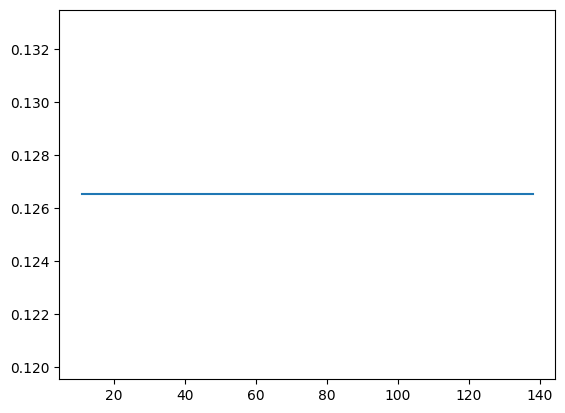

In [52]:
results_df["SOL1:solenoid_field_scale"].plot()

In [53]:
results_df.iloc[0]

project_name                                                                  local
flow_id                                        bdebb583-9307-4866-a343-0dfa82da8aae
distgen:r_dist:sigma_xy:value                                              0.137667
distgen:t_dist:length:value                                               12.374625
distgen:total_charge:value                                                  0.00004
SOL1:solenoid_field_scale                                                  0.126511
CQ01:b1_gradient                                                           0.003524
SQ01:b1_gradient                                                           0.003524
L0A_phase:dtheta0_deg                                                       -8.8997
L0A_scale:voltage                                                  70000000000000.0
end_mean_z                                                                   4.6147
end_n_particle                                                          5183

In [61]:
import numpy as np
results_df = results_df.select_dtypes(include=[np.float64])
results_df.dtypes

distgen:r_dist:sigma_xy:value     float64
distgen:t_dist:length:value       float64
distgen:total_charge:value        float64
SOL1:solenoid_field_scale         float64
CQ01:b1_gradient                  float64
SQ01:b1_gradient                  float64
L0A_phase:dtheta0_deg             float64
L0A_scale:voltage                 float64
end_mean_z                        float64
end_n_particle                    float64
end_mean_gamma                    float64
end_sigma_gamma                   float64
end_mean_x                        float64
end_mean_y                        float64
end_norm_emit_x                   float64
end_norm_emit_y                   float64
end_norm_emit_z                   float64
end_sigma_x                       float64
end_sigma_y                       float64
end_sigma_z                       float64
end_mean_px                       float64
end_mean_py                       float64
end_mean_pz                       float64
end_sigma_px                      

In [62]:
results_df.mean()

distgen:r_dist:sigma_xy:value     1.376667e-01
distgen:t_dist:length:value       1.237462e+01
distgen:total_charge:value        4.005442e-05
SOL1:solenoid_field_scale         1.265110e-01
CQ01:b1_gradient                  3.523810e-03
SQ01:b1_gradient                  3.523810e-03
L0A_phase:dtheta0_deg            -8.899700e+00
L0A_scale:voltage                 7.000000e+13
end_mean_z                        4.614700e+00
end_n_particle                    5.183837e+03
end_mean_gamma                    1.488337e+02
end_sigma_gamma                   4.847617e-01
end_mean_x                        1.381171e-06
end_mean_y                        4.753492e-07
end_norm_emit_x                   1.723838e-05
end_norm_emit_y                   1.331576e-05
end_norm_emit_z                   1.954944e-04
end_sigma_x                       2.542010e-03
end_sigma_y                       2.748671e-03
end_sigma_z                       9.321933e-04
end_mean_px                      -7.816663e+01
end_mean_py  

In [63]:
results_df.iloc[0]

distgen:r_dist:sigma_xy:value     1.376667e-01
distgen:t_dist:length:value       1.237462e+01
distgen:total_charge:value        4.005442e-05
SOL1:solenoid_field_scale         1.265110e-01
CQ01:b1_gradient                  3.523810e-03
SQ01:b1_gradient                  3.523810e-03
L0A_phase:dtheta0_deg            -8.899700e+00
L0A_scale:voltage                 7.000000e+13
end_mean_z                        4.614700e+00
end_n_particle                    5.183837e+03
end_mean_gamma                    1.488337e+02
end_sigma_gamma                   4.847617e-01
end_mean_x                        1.381171e-06
end_mean_y                        4.753492e-07
end_norm_emit_x                   1.723838e-05
end_norm_emit_y                   1.331576e-05
end_norm_emit_z                   1.954944e-04
end_sigma_x                       2.542010e-03
end_sigma_y                       2.748671e-03
end_sigma_z                       9.321933e-04
end_mean_px                      -7.816663e+01
end_mean_py  

<Axes: >

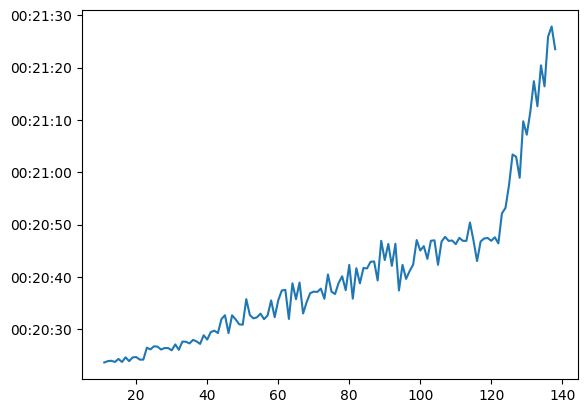

In [56]:
results_df["date_modified"].plot()